<a href="https://colab.research.google.com/github/melvin-02/Expression-detector/blob/master/Face_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/expressions.zip'

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
import os
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam


In [ ]:
train_path = "/content/images/train"
validation_path = "/content/images/validation"

In [ ]:
train_files = glob(train_path + '/*/*.jpg')
valid_files = glob(validation_path + '/*/*.jpg')

print(len(train_files), len(valid_files))

28821 7066


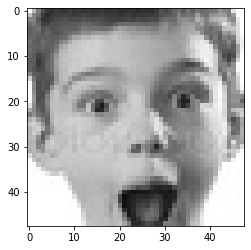

In [ ]:
img = load_img(train_files[0])
plt.imshow(img)

In [ ]:
i = Input(shape = (48,48,1))
x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2) )(x)
x = Conv2D(64, (5,5), padding='same', activation='relu')(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.5)(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='softmax')(x)

model = Model(i, x)



In [ ]:
model.compile(optimizer= Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255.0) 
                              

test_generator = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_gen = train_generator.flow_from_directory(train_path,
                                          target_size = (48,48),
                                          color_mode = "grayscale",
                                          class_mode = 'categorical',
                                          shuffle = True,
                                          batch_size = 64)

test_gen = test_generator.flow_from_directory(validation_path,
                                         target_size = (48,48),
                                         color_mode = 'grayscale',
                                         class_mode = 'categorical',
                                         shuffle = False,
                                         batch_size = 64)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
# save only the best model with the least loss
model_checkpoint_callback = ModelCheckpoint("/content/faceExp.h5",
                                            monitor = 'val_loss',
                                            save_best_only = True,
                                            save_weights_only  = False,
                                            )

In [ ]:
r = model.fit_generator(train_gen,
                    steps_per_epoch = len(train_gen.filenames)//64,
                    epochs = 25,
                    validation_data = test_gen,
                    validation_steps = len(test_gen)//64,
                    workers = -1,
                    callbacks = [model_checkpoint_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
450/450 [==============================] - 13s 29ms/step - loss: 1.8082 - accuracy: 0.2459 - val_loss: 2.0569 - val_accuracy: 0.0000e+00
Epoch 2/25
450/450 [==============================] - 13s 28ms/step - loss: 1.6416 - accuracy: 0.3485 - val_loss: 1.6946 - val_accuracy: 0.1094
Epoch 3/25
450/450 [==============================] - 12s 27ms/step - loss: 1.4618 - accuracy: 0.4315 - val_loss: 1.6770 - val_accuracy: 0.2031
Epoch 4/25
450/450 [==============================] - 12s 28ms/step - loss: 1.3681 - accuracy: 0.4725 - val_loss: 1.4730 - val_accuracy: 0.3750
Epoch 5/25
450/450 [==============================] - 12s 27ms/step - loss: 1.3063 - accuracy: 0.4992 - val_loss: 1.6144 - val_accuracy: 0.3594
Epoch 6/25
450/450 [==============================] - 12s 27ms/step - loss: 1.2581 - accuracy: 0.5207 - val_loss: 1.2928 - val_accuracy: 0.5312
Epoch 7/25
450/450 [==============================] - 12

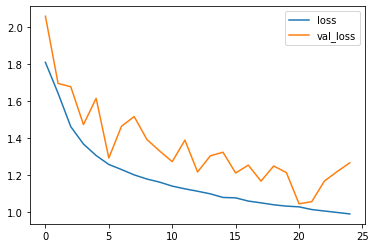

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

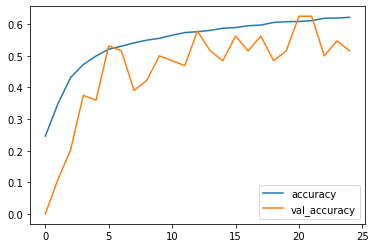

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
model.evaluate_generator(test_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[1.0812371969223022, 0.606000542640686]

In [ ]:
callback_model = tf.keras.models.load_model('/content/faceExp.h5')

In [ ]:
callback_model.evaluate_generator(test_gen)

[1.0742440223693848, 0.6016133427619934]

In [ ]:
model.save('/content/drive/My Drive/FaceExp60.h5')

In [ ]:
saved_model = tf.keras.models.load_model('/content/drive/My Drive/FaceExp61.h5')

In [ ]:
saved_model.evaluate_generator(test_gen)

[1.0546190738677979, 0.6140673756599426]

In [ ]:
label = 'angry disgust fear happy neutral sad surprise'.split()

In [ ]:
img = load_img(train_files[0], grayscale=True)
img2 = tf.keras.preprocessing.image.img_to_array(img)
img2 = np.expand_dims(img2, axis=0)
model.predict(img2)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)